In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
fifa_data = pd.read_csv(r'D:\workspace\Semester 4 FPT\AIL303m\Football Player Clustering\kl.csv', encoding='latin1')


In [3]:
fifa_data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19.0,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47.0,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143K
18203,18203,243165,N. Christoffersson,19.0,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47.0,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113K
18204,18204,241638,B. Worman,16.0,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47.0,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165K
18205,18205,246268,D. Walker-Rice,17.0,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47.0,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143K


In [4]:
fifa_data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18206.000000,18206.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122048,66.237449,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.670022,6.907059,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


1. Data Cleaning


In [5]:
fifa_data = fifa_data.drop(columns=["Photo","Flag","Club Logo","Unnamed: 0","Body Type","Special","Real Face", "ID", "LS", "ST", "RS", 
                        "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM", "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", 
                        "RDM", "RWB", "LB", "LCB", "CB", "RCB", "RB"],axis=1)

In [6]:
fifa_data.isnull().sum()

Name                            0
Age                             1
Nationality                     0
Overall                         1
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy                     48
LongPassing                    48
BallControl   

In [7]:
fifa_data["Club"].fillna("Free Agent", inplace = True)
fifa_data["Release Clause"].fillna("No Release Clause", inplace = True)
fifa_data = fifa_data.dropna(axis=0, subset=['Position'])
fifa_data["Joined"].fillna("N/A", inplace = True)
fifa_data["Loaned From"].fillna("Not on loan", inplace = True)
fifa_data["Contract Valid Until"].fillna("Free Agent", inplace = True)

C:\Users\DKC\AppData\Local\Temp\ipykernel_7352\1742915460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fifa_data["Club"].fillna("Free Agent", inplace = True)
C:\Users\DKC\AppData\Local\Temp\ipykernel_7352\1742915460.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [8]:
fifa_data = fifa_data.dropna(subset=['Age', 'Overall'])

In [9]:
fifa_data.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Jersey Number               0
Joined                      0
Loaned From                 0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

In [10]:
fifa_data.dtypes

Name                         object
Age                         float64
Nationality                  object
Overall                     float64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  

2. Data Visualization


(array([ 192.,  994., 2360., 4678., 4286., 3569., 1513.,  445.,   95.,
          13.]),
 array([46. , 50.8, 55.6, 60.4, 65.2, 70. , 74.8, 79.6, 84.4, 89.2, 94. ]),
 <BarContainer object of 10 artists>)

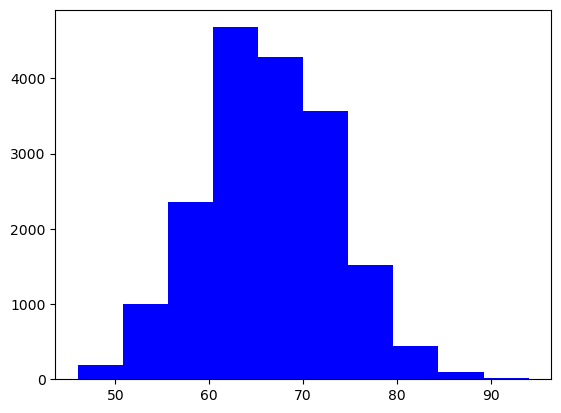

In [11]:
plt.hist(fifa_data['Overall'], color='blue') 

(array([  16.,  100.,  989., 2958., 5628., 4905., 2181., 1096.,  244.,
          28.]),
 array([48. , 52.7, 57.4, 62.1, 66.8, 71.5, 76.2, 80.9, 85.6, 90.3, 95. ]),
 <BarContainer object of 10 artists>)

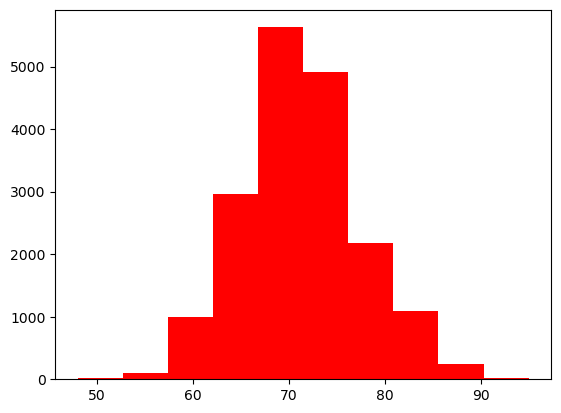

In [12]:
plt.hist(fifa_data['Potential'], color='red')


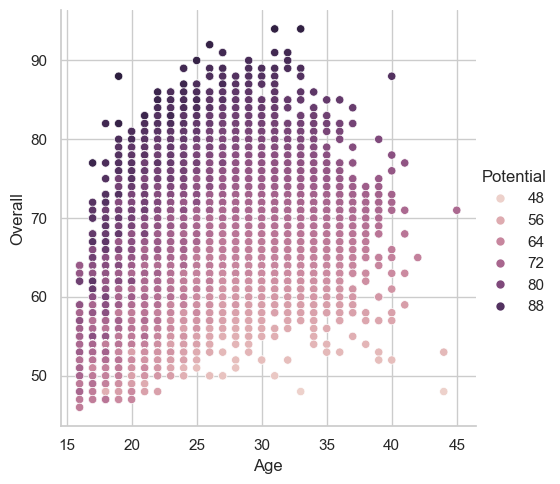

In [13]:
sns.set(style="whitegrid")
sns.relplot(
    data = fifa_data,
    x="Age",y="Overall",hue="Potential")

Text(0.5, 0, 'Players')

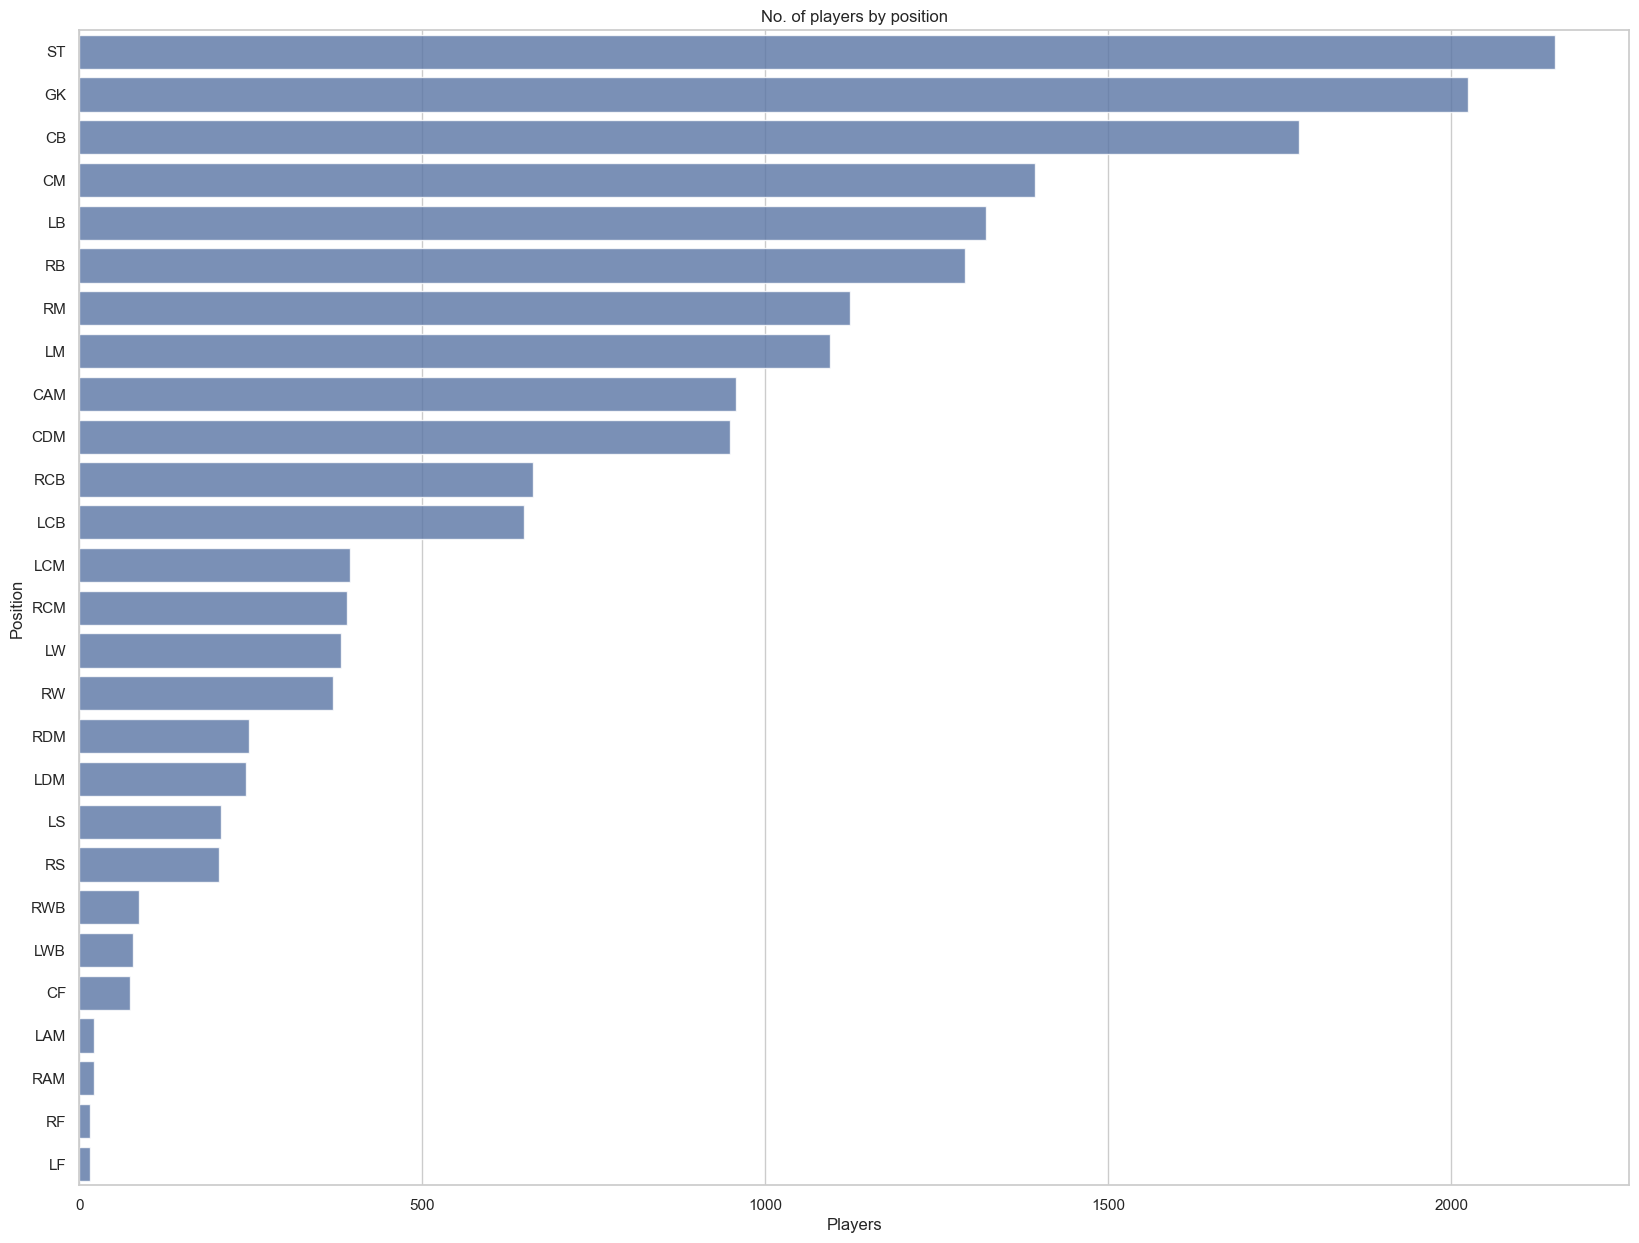

In [14]:
position_count = fifa_data['Position'].value_counts()
plt.figure(figsize=(20,15))
sns.barplot(y=position_count.index, x=position_count.values, alpha=0.8)
plt.title('No. of players by position')
plt.ylabel('Position', fontsize=12)
plt.xlabel('Players', fontsize=12)

Text(0.5, 0, 'Players')

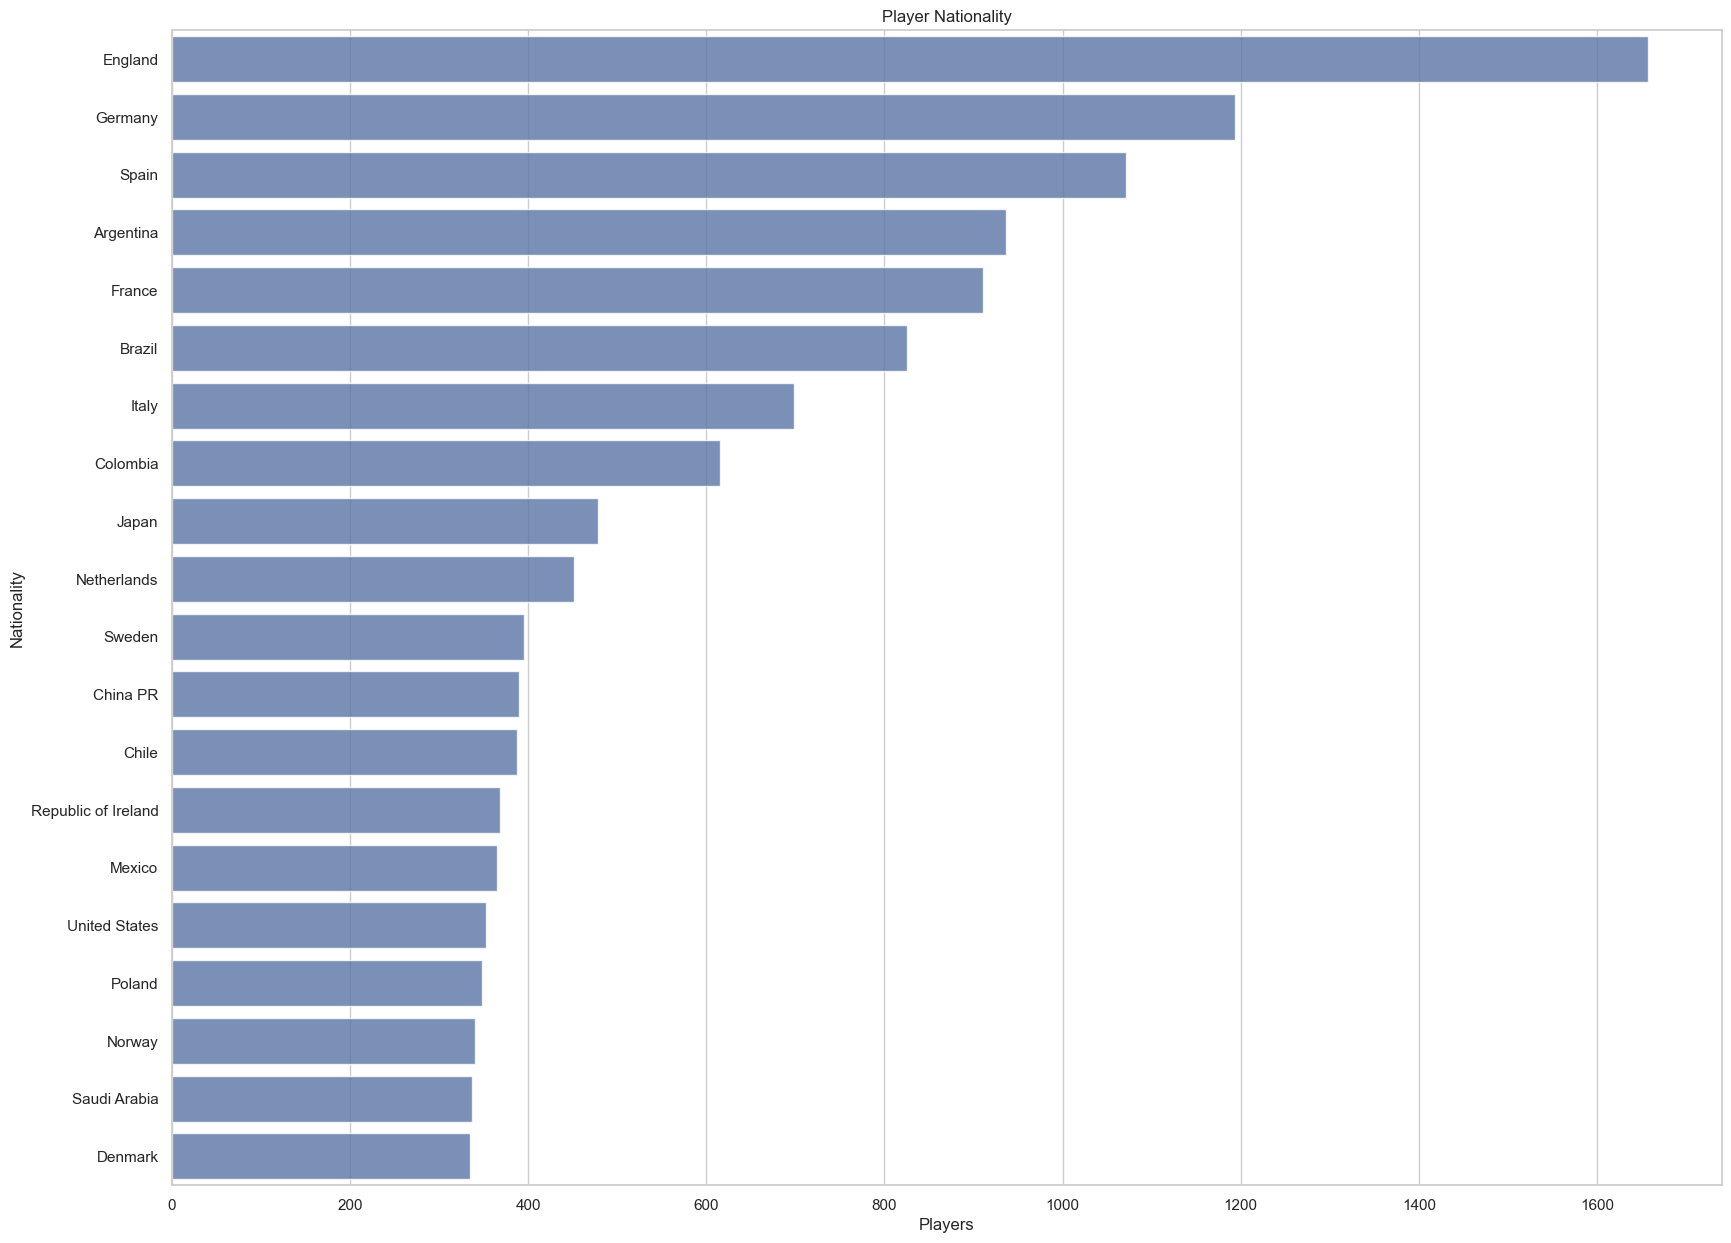

In [15]:
nation_count = fifa_data['Nationality'].value_counts()
nation_count = nation_count[0:20]
plt.figure(figsize=(20,15))
sns.barplot(x = nation_count.values,y= nation_count.index,  alpha=0.8)
plt.title('Player Nationality')
plt.ylabel('Nationality', fontsize=12)
plt.xlabel('Players', fontsize=12)

In [16]:
SAF = ["Aldosivi", "Argentinos Jrs.", "Atlético Tucumán", "Banfield","Belgrano","Buenos Aires","Colón","Defensa","Estudiantes","Gimnasia","Godoy Cruz",
"Huracán","Independiente","Lanús","Newell's","Patronato","Racing Club","River Plate","Rosario Central","San Lorenzo","San Martín","SM Tucumán","Talleres",
"Tigre","Unión","Vélez Sarsfield", "Boca Juniors", "Club Atlético Huracán"]
HYUNDAI_A_LEAGUE = ["Adelaide United","Brisbane Roar","Central Coast","Melb. Victory","Melbourne City","Newcastle Jets","Perth Glory","Sydney FC","Well. Phoenix","WS Wanderers",
                    "Melbourne Victory"]
O_BUNDESLIGA = ["Admira Wacker","FK Austria Wien","Innsbruck","LASK Linz","RB Salzburg","SCR Altach","SK Rapid Wien","SK Sturm Graz","SKN St. Pölten","SV Mattersburg",
                "TSV Hartberg","Wolfsberger AC", "FC Red Bull Salzburg"]
PRO_LEAGUE = ["Cercle Brugge","Club Brugge","Excel Mouscron","KAA Gent","KAS Eupen","KRC Genk","KV Kortrijk","KV Oostende","Royal Antwerp FC","RSC Anderlecht",
              "Sint-Truiden","Sp. Charleroi","Sport. Lokeren","Standard Liège","Waasl. Beveren","Zulte-Waregem", "Club Brugge KV", "Standard de Liège"]
LIGA_DO_BRASIL = ["América""Atl. Paranaense","Atlético Mineiro","Bahia","Botafogo","Ceará SC","Chapecoense","Cruzeiro","Fluminense","Grêmio","Internacional","Paraná",
                  "Santos","Sport","Vitória"]
CAMP_SCOTIABANK = ["Audax Italiano","CD Antofagasta","CD Huachipato","CD O'Higgins","CD Palestino","CD Viñazur","Curicó Unido","Depor. Iquique","Deportes Temuco",
                   "Everton de Viña","San Luis","Uni. Católica","Uni. Concepción","Uni. de Chile","Unión Española","Unión La Calera"]
CSL = ["Beijing Guoan","Beijing Renhe","Changchun Yatai","Chongqing SWM","Dalian Yifang","Guangzhou","Guangzhou R&F","Guizhou Hengfeng","Hebei CFFC","Henan Jianye",
       "Jiangsu Suning","Shandong Luneng","Shanghai Shenhua","Shanghai SIPG","Tianjin Quanjian","Tianjin TEDA", "Guangzhou Evergrande Taobao FC", "Dalian YiFang FC",
       "Shanghai SIPG FC", "Beijing Sinobo Guoan FC", "Tianjin Quanjian FC", "Guangzhou R&F; FC", "Beijing Renhe FC", "Hebei China Fortune FC", "Jiangsu Suning FC",
       "Shanghai Greenland Shenhua FC", "Changchun Yatai FC", "Guizhou Hengfeng FC"]
LIGA_DIMAYOR = ["Al. Petrolera","América de Cali","Atl. Bucaramanga","Atl. Nacional","Atlético Huila","Boyacá Chicó","Deportes Tolima","Deportivo Cali",
                "Deportivo Pasto","Envigado","Ind. Santa Fe","Indep. Medellín","Jaguares","Junior","La Equidad","Leones","Millonarios","Once Caldas","Patriotas",
                "Rionegro Águilas"]
SUPERLIGA = ["Aalborg BK","Aarhus GF","AC Horsens","Brøndby IF","Esbjerg fB","FC København","FC Midtjylland","FC Nordsjælland","Hobro IK","Odense BK","Randers FC",
             "SønderjyskE","Vejle Boldklub","Vendsyssel FF"]
PREMIER_LEAGUE = ["Arsenal","Bournemouth","Brighton","Burnley","Cardiff City","Chelsea","Crystal Palace","Everton","Fulham","Huddersfield","Leicester City",
                  "Liverpool","Manchester City","Manchester United","Newcastle Utd","Southampton","Spurs","Watford","West Ham","Wolves", "Tottenham Hotspur", 
                  "West Ham United", "Wolverhampton Wanderers", "Brighton & Hove Albion", "Newcastle United", "Huddersfield Town"]
EFL_CHAMPIONSHIP = ["Aston Villa","Birmingham City","Blackburn Rovers","Bolton","Brentford","Bristol City","Derby County","Hull City","Ipswich","Leeds United",
                    "Middlesbrough","Millwall","Norwich","Nott'm Forest","Preston","QPR","Reading","Rotherham Utd","Sheffield Utd","Sheffield Wed","Stoke City",
                    "Swansea City","West Brom","Wigan Athletic", "West Bromwich Albion"]
EFL_LEAGUE_ONE = ["Accrington","AFC Wimbledon","Barnsley","Blackpool","Bradford City","Bristol Rovers","Burton Albion","Charlton Ath","Coventry City","Doncaster",
                  "Fleetwood Town","Gillingham","Luton Town","Oxford United","Peterborough","Plymouth Argyle","Portsmouth","Rochdale","Scunthorpe Utd","Shrewsbury",
                  "Southend United","Sunderland","Walsall","Wycombe"]
EFL_LEAGUE_TWO = ["Bury","Cambridge Utd","Carlisle United","Cheltenham Town","Colchester","Crawley Town","Crewe Alexandra","Exeter City",
                  "Forest Green","Grimsby Town","Lincoln City","Macclesfield","Mansfield Town","MK Dons","Morecambe","Newport County","Northampton",
                  "Notts County","Oldham Athletic","Port Vale","Stevenage","Swindon Town","Tranmere Rovers","Yeovil Town"]
LIGUE_1 = ["Amiens SC","Angers SCO","AS Monaco","ASSE","Dijon FCO","EA Guingamp","FC Nantes","Girondins de Bx","LOSC Lille","Montpellier HSC","Nîmes Olympique",
           "OGC Nice","OL","OM","Paris","RC Strasbourg","SM Caen","Stade de Reims","Stade Rennais","Toulouse FC", "Paris Saint-Germain", "Olympique Lyonnais","Olympique de Marseille",
           "AS Saint-Étienne", "Stade Rennais FC", "Stade Malherbe Caen", "Toulouse Football Club", "FC Girondins de Bordeaux"]
LIGUE_2 = ["AC Ajaccio","AJ Auxerre","AS Béziers","Chamois FC","Clermont Foot","ESTAC Troyes","FC Lorient","FC Metz","FCSM","Gazélec Ajaccio","Grenoble Foot",
           "Havre AC","La Berrichonne","Nancy","Paris FC","RC Lens","Red Star FC","Stade Brestois","US Orléans","Valenciennes FC"]
BUNDESLIGA = ["1. FC Nürnberg","1. FSV Mainz 05","Dortmund","Düsseldorf","FC Augsburg","FC Bayern","Frankfurt","Hannover 96","Hertha BSC","Leverkusen","M'gladbach",
              "RB Leipzig","SC Freiburg","Schalke","TSG Hoffenheim","VfB Stuttgart","VfL Wolfsburg","Werder Bremen", "FC Bayern München", "Borussia Dortmund","FC Schalke 04",
              "Bayer 04 Leverkusen", "1. FC Köln", "TSG 1899 Hoffenheim", "Borussia Mönchengladbach", "SV Werder Bremen", "Eintracht Frankfurt"]
BUNDESLIGA_2 = ["Aue","Bielefeld","Bochum","Darmstadt","Dresden","Duisburg","Fürth","Hamburg","Heidenheim","Ingolstadt","Kiel","Köln","Magdeburg","Paderborn","Regensburg",
                "Sandhausen","St. Pauli","Union Berlin", "Hamburger SV"]
Three_LIGA = ["1860 München","Braunschweig","Carl Zeiss Jena","Energie Cottbus","Fortuna Köln","FSV Zwickau","Hallescher FC","Hansa Rostock","Kaiserslautern","Karlsruher SC",
              "KFC Uerdingen","Preußen Münster","S. Großaspach","Sportfreunde Lotte","SV Meppen","SV Wehen","Unterhaching","VfL Osnabrück","VfR Aalen","Würzburg"]
SSE_AIRTRICITY_LEAGUE = ["Bohemian FC","Bray Wanderers","Cork City","Derry City","Dundalk","Limerick FC","Shamrock Rovers","Sligo Rovers","St. Pats","Waterford FC"]
SERIE_A_TIM = ["Atalanta","Bologna","Cagliari","Chievo Verona","Empoli","Fiorentina","Frosinone","Genoa","Inter","Juventus","Lazio","Milan","Napoli","Parma","Roma",
               "Sampdoria","Sassuolo","SPAL","Torino","Udinese"]
CALCIO_B = ["Ascoli","Benevento","Brescia", "Carpi", "Cittadella", "Cosenza", "Cremona", "Crotone","Foggia", "Hellas Verona","La Spezia", "Lecce", "Livorno", "Padova", 
            "Palermo", "Perugia", "Pescara", "Salerno","Venezia"]
MEIJI_YASUDAJ1 = ["Cerezo Osaka","F.C. Tokyo","Gamba Osaka","H.Consa.Sapporo","Júbilo Iwata","Kashima Antlers","Kashiwa Reysol","Kawasaki-F","Nagoya Grampus","Sagan Tosu",
                  "Shimizu S-Pulse","S-Hiroshima","Shonan Bellmare","Urawa Reds","Vegalta Sendai","Vissel Kobe","V-Varen Nagasaki","Yokohama F･M"]
KLEAGUE1 = ["Daegu FC","FC Seoul","Gangwon FC","Gyeongnam FC","Incheon United","Jeju United","Jeonbuk Hyundai","Jeonnam Dragons","Pohang Steelers","Sangju Sangmu",
            "Suwon Samsung","Ulsan Hyundai"]
LIGA_BANCOMER_MX = ["América","Atlas","Cruz Azul","Guadalajara","León","Lobos","Monarcas Morelia","Monterrey","Necaxa","Pachuca","Puebla","Querétaro","Santos Laguna",
                    "Tigres","Tijuana","Toluca","U.N.A.M.","Veracruz", "Tigres U.A.N.L.", "América FC (Minas Gerais)"]
EREDIVISIE = ["ADO Den Haag","Ajax","AZ","De Graafschap","Excelsior","FC Emmen","FC Groningen","FC Utrecht","Feyenoord","Fortuna Sittard","Heracles Almelo",
              "NAC Breda","PEC Zwolle","PSV","SC Heerenveen","Vitesse","VVV-Venlo","Willem II"]
ELITESERIEN = ["FK Bodø/Glimt","FK Haugesund","IK Start","Kristiansund","Lillestrøm SK","Molde FK","Odds BK","Ranheim Fotball","Rosenborg BK","Sandefjord","Sarpsborg 08 FF",
               "SK Brann","Stabæk Fotball","Strømsgodset IF","Tromsø IL","Vålerenga Fotball"]
EKSTRAKLASA = ["Arka Gdynia","Cracovia","Górnik Zabrze","Jagiellonia","Korona Kielce","Lech Poznań","Lechia Gdańsk","Legia Warszawa","Miedź Legnica","Piast Gliwice",
               "Pogoń Szczecin","Śląsk Wrocław","Wisła Kraków","Wisła Płock","Z. Sosnowiec","Zagłębie Lubin"]
LIGA_NOS = ["Belenenses","Boavista FC","CD Feirense","CD Tondela","Desportivo Aves","FC Porto","Funchal","GD Chaves","Marítimo","Moreirense FC","Portimonense SC",
            "Rio Ave FC","Santa Clara","SC Braga","SL Benfica","Sporting CP","V. Guimarães","V. Setúbal"]
REST_OF_WORLD = ["AEK Athens","CSKA Moscow","Dinamo Zagreb","Dynamo Kyiv","HJK Helsinki","Kaizer Chiefs","Lokomotiv Moscow","Olympiacos CFP","Orlando Pirates",
                 "Panathinaikos","PAOK","Shakhtar Donetsk","Slavia Praha","Sparta Praha","Spartak Moscow","Viktoria Plzeň", "PFC CSKA Moscow"]
SAUDI_PROFESSIONAL_LEAGUE = ["Al Ahli","Al Batin","Al Faisaly","Al Fateh","Al Fayha","Al Hazem","Al Hilal","Al Ittihad","Al Nassr","Al Qadisiyah","Al Raed",
                             "Al Shabab","Al Wehda","Al Taawoun","Ettifaq FC","Ohod Club"]
SCOTTISH_PREMIERSHIP = ["Aberdeen","Celtic","Dundee FC","Hamilton","Hearts","Hibernian","Kilmarnock","Livingston","Motherwell","Rangers","St. Johnstone","St. Mirren"]
LALIGA_SANTANDER = ["Athletic Club","Atlético Madrid","CD Leganés","D. Alavés","FC Barcelona","Getafe CF","Girona FC","Levante UD","R. Valladolid CF","Rayo Vallecano",
          "RC Celta","RCD Espanyol","Real Betis","Real Madrid","Real Sociedad","SD Eibar","SD Huesca","Sevilla FC","Valencia CF","Villarreal CF", "Athletic Club de Bilbao",
          "Deportivo Alavés", "Real Valladolid CF"]
LALIGA_123 = ["AD Alcorcón","Albacete BP","CA Osasuna","Cádiz CF","CD Lugo","CD Numancia","CD Tenerife","CF Rayo","CF Reus","Córdoba CF","Elche CF",
              "Extremadura UD","Granada CF","Málaga CF","Nàstic","R. Oviedo","R. Sporting","R. Zaragoza","RC Deportivo","RCD Mallorca","UD Almería","UD Las Palmas"]
ALLSVENSKAN = ["AIK","BK Häcken","Brommapojkarna","Dalkurd FF","Djurgårdens IF","GIF Sundsvall","Hammarby IF","IF Elfsborg","IFK Göteborg","IFK Norrköping","IK Sirius",
               "Kalmar FF","Malmö FF","Örebro SK","Östersunds FK","Trelleborgs FF"]
RAIFFEISEN_SUPER_LEAGUE = ["BSC Young Boys","FC Basel","FC Lugano","FC Luzern","FC Sion","FC St. Gallen","FC Thun","FC Zürich","Grasshopper Club","Neuchâtel Xamax", "FC Basel 1893"]
SUPER_LIG = ["Akhisarspor","Alanyaspor","Antalyaspor","Başakşehir","BB Erzurumspor","Beşiktaş","Bursaspor","Çaykur Rizespor","Fenerbahçe","Galatasaray","Göztepe",
             "Kasimpaşa","Kayserispor","Konyaspor","MKE Ankaragücü","Sivasspor","Trabzonspor","Yeni Malatyaspor", "Beşiktaş JK", "Medipol Başakşehir FK", "Galatasaray SK", 
             "Fenerbahçe SK", "Kasimpaşa SK"]
MLS = ["Atlanta United","Chicago Fire","Colorado Rapids","Columbus Crew SC","D.C. United","FC Dallas","Houston Dynamo","Impact Montréal","LAFC","LA Galaxy","Minnesota United",
       "New England","New York City FC","NY Red Bulls","Orlando City","Philadelphia","Portland Timbers","Real Salt Lake","Seattle Sounders","SJ Earthquakes","Sporting KC",
       "Toronto FC","Whitecaps FC", "Los Angeles FC", "Montreal Impact", "DC United", "Seattle Sounders FC"]

In [17]:
conditions = [(fifa_data['Club'].isin(SAF)),
              (fifa_data['Club'].isin(HYUNDAI_A_LEAGUE)),
              (fifa_data['Club'].isin(O_BUNDESLIGA)),
              (fifa_data['Club'].isin(PRO_LEAGUE)),
              (fifa_data['Club'].isin(LIGA_DO_BRASIL)),
              (fifa_data['Club'].isin(CAMP_SCOTIABANK)),
              (fifa_data['Club'].isin(CSL)),
              (fifa_data['Club'].isin(LIGA_DIMAYOR)),
              (fifa_data['Club'].isin(SUPERLIGA)),
              (fifa_data['Club'].isin(PREMIER_LEAGUE)),
              (fifa_data['Club'].isin(EFL_CHAMPIONSHIP)),
              (fifa_data['Club'].isin(EFL_LEAGUE_ONE)),
              (fifa_data['Club'].isin(EFL_LEAGUE_TWO)),
              (fifa_data['Club'].isin(LIGUE_1)),
              (fifa_data['Club'].isin(LIGUE_2)),
              (fifa_data['Club'].isin(BUNDESLIGA)),
              (fifa_data['Club'].isin(BUNDESLIGA_2)),
              (fifa_data['Club'].isin(Three_LIGA)),
              (fifa_data['Club'].isin(SSE_AIRTRICITY_LEAGUE)),
              (fifa_data['Club'].isin(SERIE_A_TIM)),
              (fifa_data['Club'].isin(CALCIO_B)),
              (fifa_data['Club'].isin(MEIJI_YASUDAJ1)),
              (fifa_data['Club'].isin(KLEAGUE1)),
              (fifa_data['Club'].isin(LIGA_BANCOMER_MX)),
              (fifa_data['Club'].isin(EREDIVISIE)),
              (fifa_data['Club'].isin(ELITESERIEN)),
              (fifa_data['Club'].isin(EKSTRAKLASA)),
              (fifa_data['Club'].isin(LIGA_NOS)),
              (fifa_data['Club'].isin(REST_OF_WORLD)),
              (fifa_data['Club'].isin(SAUDI_PROFESSIONAL_LEAGUE)),
              (fifa_data['Club'].isin(SCOTTISH_PREMIERSHIP)),
              (fifa_data['Club'].isin(LALIGA_SANTANDER)),
              (fifa_data['Club'].isin(LALIGA_123)),
              (fifa_data['Club'].isin(ALLSVENSKAN)),
              (fifa_data['Club'].isin(RAIFFEISEN_SUPER_LEAGUE)),
              (fifa_data['Club'].isin(SUPER_LIG)),
              (fifa_data['Club'].isin(MLS))
]
values = ['SAF', 'HYUNDAI A-LEAGUE', 'Ö. BUNDESLIGA', 'PRO LEAGUE', 'LIGA DO BRASIL', 'CAMP. SCOTIABANK', 'CSL', 'LIGA DIMAYOR', 'SUPERLIGA', 'PREMIER LEAGUE', 'EFL CHAMPIONSHIP',
          'EFL LEAGUE ONE', 'EFL LEAGUE TWO', 'LIGUE 1 CONFORAMA', "DOMINO'S LIGUE 2", 'BUNDESLIGA', 'BUNDESLIGA 2', '3. LIGA', 'SSE AIRTRICITY LEAGUE', 'SERIE A TIM', 'CALCIO B',
          'MEIJI YASUDA J1', 'K-LEAGUE 1', 'LIGA BANCOMER MX', 'EREDIVISIE', 'ELITESERIEN', 'EKSTRAKLASA', 'LIGA NOS', 'REST OF WORLD', 'SAUDI PROFESSIONAL LEAGUE', 'SCOTTISH PREMIERSHIP',
          'LALIGA SANTANDER', 'LALIGA 1 | 2 | 3', 'ALLSVENSKAN', 'RAIFFEISEN SUPER LEAGUE', 'SÜPER LIG', 'MLS'
          ]

fifa_data['League'] = np.select(conditions, values)

In [18]:
fifa_data

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League
0,L. Messi,31.0,Argentina,94.0,94,FC Barcelona,110.5M,565K,Left,5.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M,LALIGA SANTANDER
1,Cristiano Ronaldo,33.0,Portugal,94.0,94,Juventus,77M,405K,Right,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M,SERIE A TIM
2,Neymar Jr,26.0,Brazil,92.0,93,Paris Saint-Germain,118.5M,290K,Right,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M,LIGUE 1 CONFORAMA
3,De Gea,27.0,Spain,91.0,93,Manchester United,72M,260K,Right,4.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M,PREMIER LEAGUE
4,K. De Bruyne,27.0,Belgium,91.0,92,Manchester City,102M,355K,Right,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M,PREMIER LEAGUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19.0,England,47.0,65,Crewe Alexandra,60K,1K,Right,1.0,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143K,EFL LEAGUE TWO
18203,N. Christoffersson,19.0,Sweden,47.0,63,Trelleborgs FF,60K,1K,Right,1.0,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113K,ALLSVENSKAN
18204,B. Worman,16.0,England,47.0,67,Cambridge United,60K,1K,Right,1.0,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165K,0
18205,D. Walker-Rice,17.0,England,47.0,66,Tranmere Rovers,60K,1K,Right,1.0,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143K,EFL LEAGUE TWO


Text(0.5, 0, 'League')

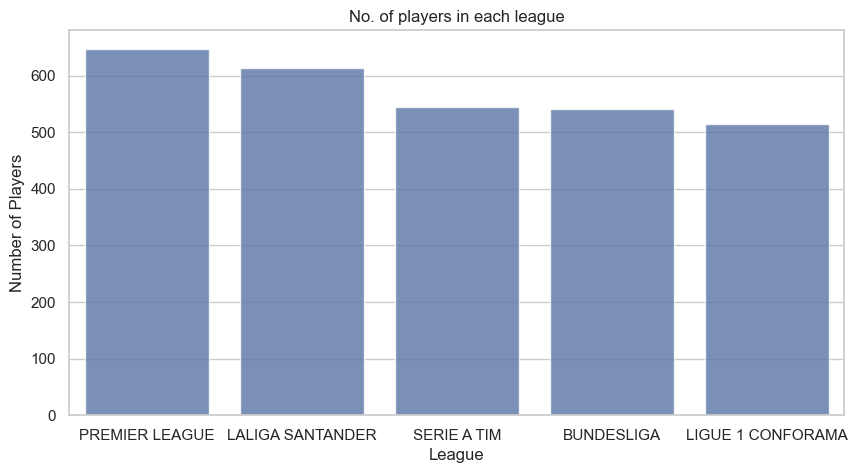

In [19]:
league_count = fifa_data['League'].value_counts()
league_count = league_count[1:6]
plt.figure(figsize=(10,5))
sns.barplot(x = league_count.index, y= league_count.values, alpha=0.8)
plt.title('No. of players in each league')
plt.ylabel('Number of Players', fontsize=12)
plt.xlabel('League', fontsize=12)

In [20]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18145 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18145 non-null  object 
 1   Age                       18145 non-null  float64
 2   Nationality               18145 non-null  object 
 3   Overall                   18145 non-null  float64
 4   Potential                 18145 non-null  int64  
 5   Club                      18145 non-null  object 
 6   Value                     18145 non-null  object 
 7   Wage                      18145 non-null  object 
 8   Preferred Foot            18145 non-null  object 
 9   International Reputation  18145 non-null  float64
 10  Weak Foot                 18145 non-null  float64
 11  Skill Moves               18145 non-null  float64
 12  Work Rate                 18145 non-null  object 
 13  Position                  18145 non-null  object 
 14  Jersey Numb

In [38]:
feat_col = ['Overall', 'Potential','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']
fifa_data[feat_col]

,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,94.0,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,94.0,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,92.0,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,91.0,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,91.0,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,47.0,65,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,47.0,63,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,47.0,67,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,47.0,66,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0


<Axes: >

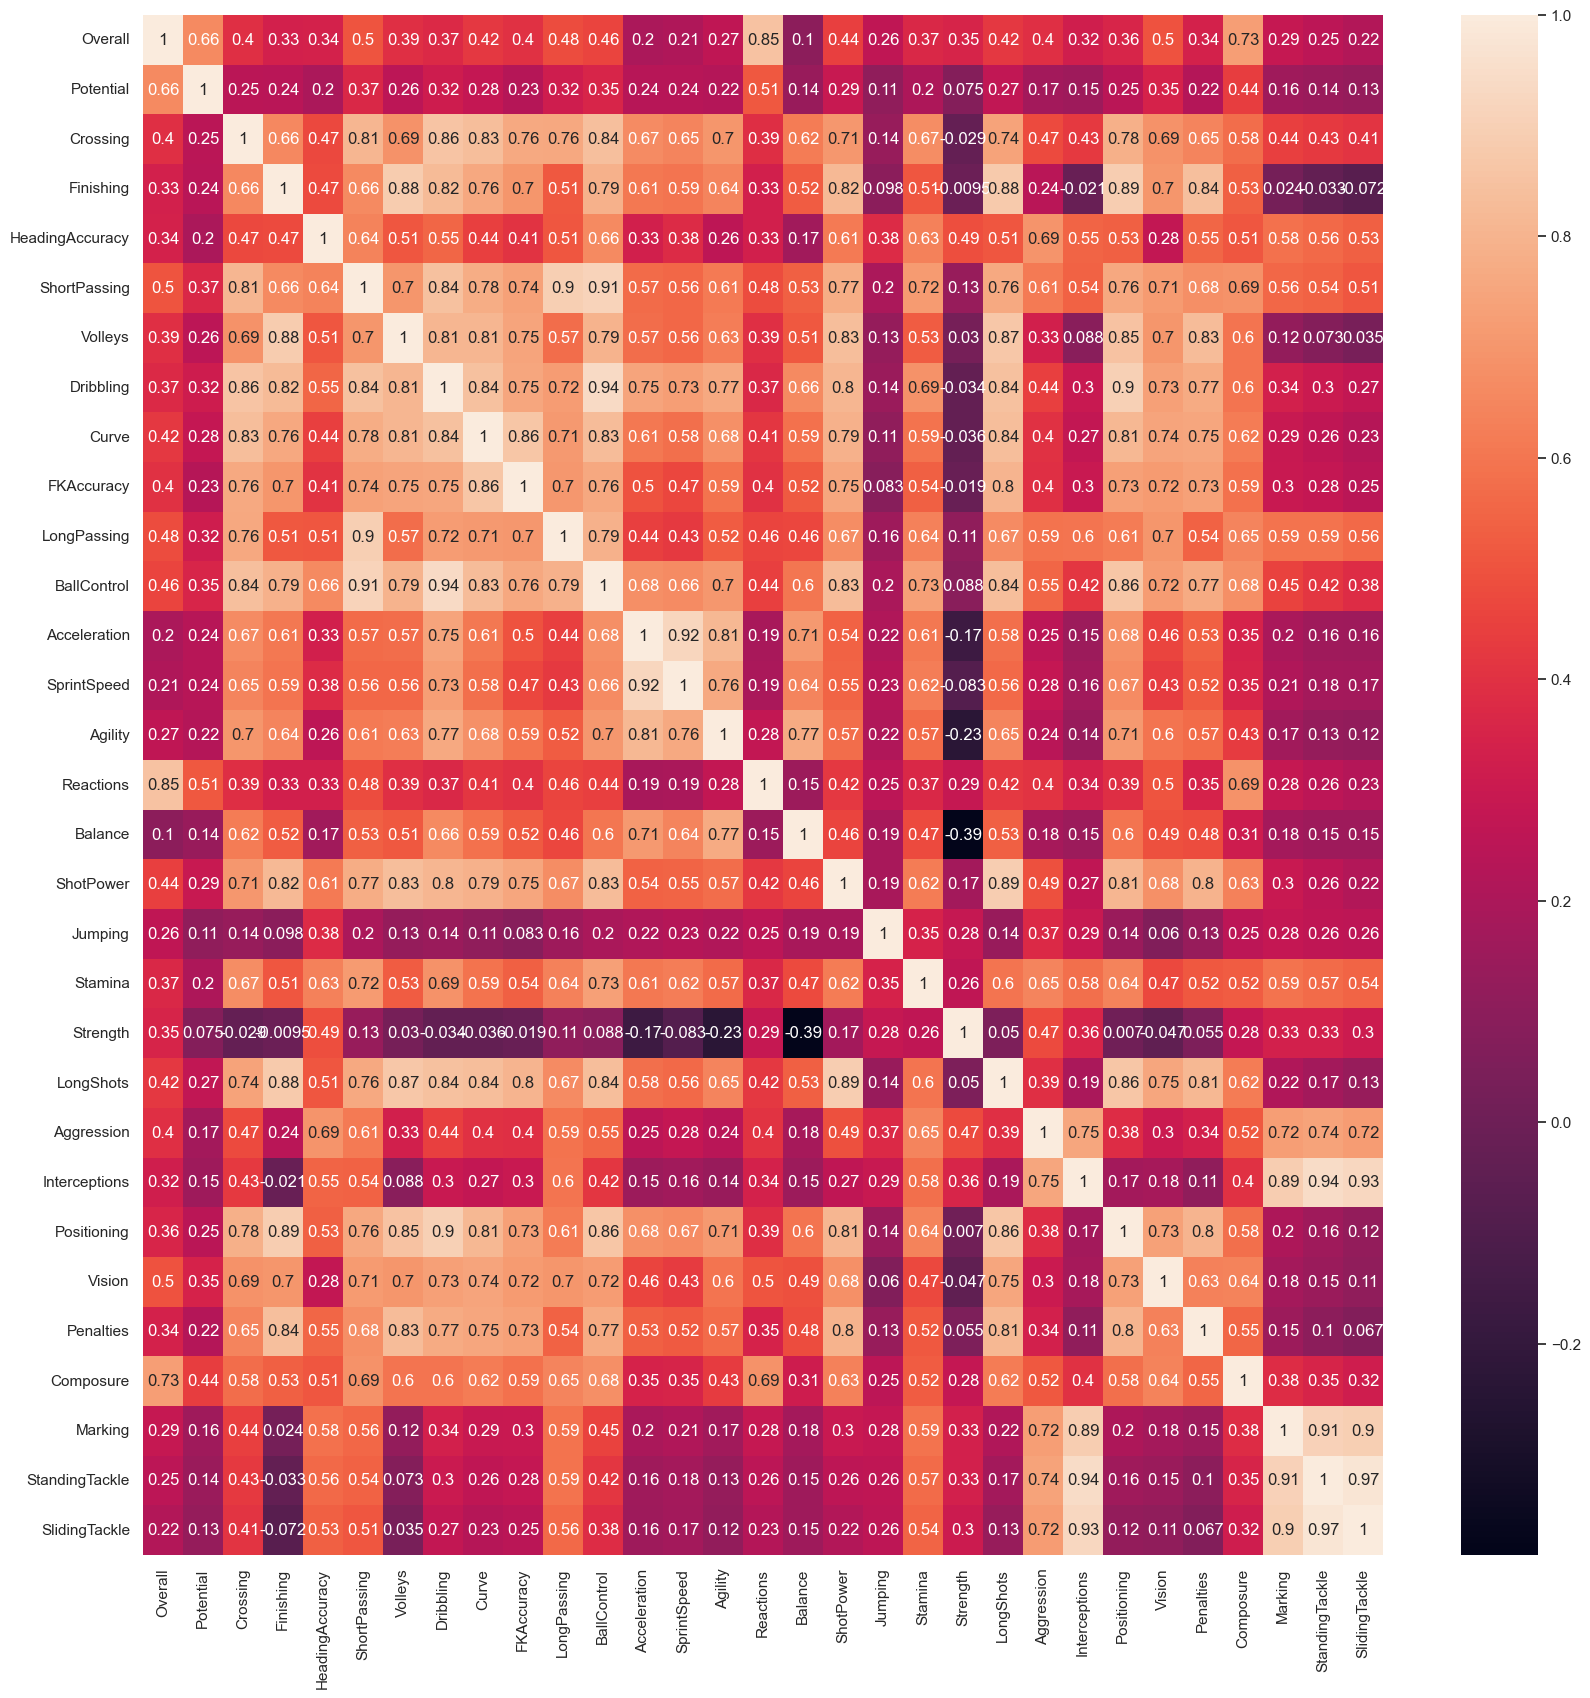

In [27]:
corr = fifa_data[feat_col].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)


In [28]:
sorted_corr = corr['Overall'].sort_values(ascending=False).drop('Overall')

In [29]:
top_10_features = sorted_corr.head(10).index
top_10_features

Index(['Reactions', 'Composure', 'Potential', 'ShortPassing', 'Vision',
       'LongPassing', 'BallControl', 'ShotPower', 'LongShots', 'Curve'],
      dtype='object')

In [35]:
feat_col_nor = ['Reactions', 'Composure', 'Potential', 'ShortPassing', 'Vision',
       'LongPassing', 'BallControl', 'ShotPower', 'LongShots', 'Curve']

In [81]:
def classify_tier(overall):
    if overall < 50:
        return 5
    elif 50 <= overall < 60:
        return 4
    elif 60 <= overall < 70:
        return 3
    elif 70 <= overall < 80:
        return 2
    elif 80 <= overall < 90:
        return 1
    else:
        return 0

In [82]:
fifa_data_last = fifa_data[feat_col].copy()
fifa_data_last

,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,94.0,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,94.0,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,92.0,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,91.0,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,91.0,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,47.0,65,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,47.0,63,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,47.0,67,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,47.0,66,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0


In [83]:
fifa_data_last['Tier'] = fifa_data_last['Overall'].apply(classify_tier)
fifa_data_last

,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Tier
0,94.0,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,...,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,0
1,94.0,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,0
2,92.0,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,...,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,0
3,91.0,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,...,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,0
4,91.0,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,...,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,47.0,65,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,...,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,5
18203,47.0,63,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,...,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,5
18204,47.0,67,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,...,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,5
18205,47.0,66,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,...,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,5


In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
X = fifa_data[feat_col_nor]

X_scaled = StandardScaler().fit_transform(X)

X_scaled

array([[ 3.68181724,  3.26621687,  3.70015022, ...,  1.71388206,
         2.43458541,  2.49139845],
       [ 3.79283698,  3.17877005,  3.70015022, ...,  2.29417659,
         2.38266115,  1.83897573],
       [ 3.5707975 ,  3.09132324,  3.53699055, ...,  1.4237348 ,
         1.81149427,  2.21955565],
       ...,
       [-1.64713037, -1.54335798, -0.7051609 , ..., -0.60729605,
        -0.10970342, -0.49887237],
       [-4.53364367, -1.1061239 , -0.86832057, ...,  0.49526355,
        -0.6808703 , -0.71634661],
       [-1.20305141, -1.36846435, -0.86832057, ..., -0.72335496,
        -0.78471882, -0.39013525]])

In [86]:
# Dropping the original continuous columns in the dataframe
X = X.drop(columns=feat_col_nor, axis=1)

# Adding scaled columns to our dataset
X[feat_col_nor] = X_scaled

# Finalized Feature Dataset
X

,Reactions,Composure,Potential,ShortPassing,Vision,LongPassing,BallControl,ShotPower,LongShots,Curve
0,3.681817,3.266217,3.700150,2.130554,2.870023,2.237247,2.255439,1.713882,2.434585,2.491398
1,3.792837,3.178770,3.700150,1.518035,2.021634,1.584613,2.135548,2.294177,2.382661,1.838976
2,3.570797,3.091323,3.536991,1.722208,2.375129,1.649876,2.195493,1.423735,1.811494,2.219556
3,3.126719,0.817706,3.536991,-0.591750,1.031845,-0.112237,-0.981630,-1.419708,-1.823204,-1.423138
4,3.237738,2.566642,3.373831,2.266669,2.870023,2.498301,1.955710,2.062059,2.278813,2.056450
...,...,...,...,...,...,...,...,...,...,...
18202,-1.425091,-1.193571,-1.031480,-0.659808,-0.099341,-0.503818,-0.921684,-0.723355,-0.473173,-0.933821
18203,-2.424269,-1.455911,-1.357800,-1.068154,-1.442625,-1.809087,-1.101521,-0.839414,-0.265476,-0.825084
18204,-1.647130,-1.543358,-0.705161,-1.408442,-0.735634,-1.613297,-0.861738,-0.607296,-0.109703,-0.498872
18205,-4.533644,-1.106124,-0.868321,-1.136211,-0.452837,-1.352243,-0.382173,0.495264,-0.680870,-0.716347


In [87]:
y = fifa_data_last['Tier']
y

0        0
1        0
2        0
3        0
4        0
        ..
18202    5
18203    5
18204    5
18205    5
18206    5
Name: Tier, Length: 18145, dtype: int64

Model #1: Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

In [89]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
# Determine scale_pos_weight based on class imbalance
count_class_1, count_class_2, count_class_3, count_class_4, count_class_5, count_class_6 = y_test.value_counts()
print(count_class_1, count_class_2, count_class_3, count_class_4, count_class_5, count_class_6)

2450 1252 670 139 22 4


In [92]:
param_grid_lr = {'C': [0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

In [93]:
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_model = LogisticRegression()

In [94]:
# Starting the tiemr
start_time = time.time()

# Perform nested cross-validation with grid search

grid = GridSearchCV(lr_model, param_grid=param_grid_lr, cv=cv_inner, scoring='accuracy', n_jobs=-1)
scores = cross_val_score(grid, X_train, y_train, cv=cv_outer, scoring='accuracy', n_jobs=-1)


print(scores)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

[0.78728876 0.786554   0.79206466 0.79272326 0.80044101]
Execution time: 78.36590051651001 seconds


In [95]:
# Fitting the best model on the entire training set
grid.fit(X_train, y_train)
best_lr_model = grid.best_estimator_

# Stopping the tiemr
end_time = time.time()

lr_training_time = end_time - start_time

c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [96]:
print("Best parameters: ", grid.best_params_)
print ("Model Training Time: {:.3f} seconds".format(lr_training_time))

Best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Model Training Time: 100.150 seconds


In [97]:
print(classification_report(y_train, best_lr_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.84      0.68      0.75       401
           2       0.82      0.79      0.80      3830
           3       0.79      0.87      0.83      7163
           4       0.73      0.60      0.66      2138
           5       0.00      0.00      0.00        67

    accuracy                           0.79     13608
   macro avg       0.53      0.49      0.51     13608
weighted avg       0.79      0.79      0.79     13608



c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [98]:
# Classfication report for training data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00       139
           2       0.12      0.01      0.02      1252
           3       0.16      0.08      0.10      2450
           4       0.11      0.43      0.17       670
           5       0.04      0.91      0.07        22

    accuracy                           0.11      4537
   macro avg       0.07      0.24      0.06      4537
weighted avg       0.13      0.11      0.09      4537



c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model #2: XG Boost

In [99]:
import xgboost as xgb

In [100]:
xgb_model = xgb.XGBClassifier()

In [101]:
# Defining the hyper-parameter grid for XG Boost
param_grid_xgb = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [3, 5, 7],
              'n_estimators': [100, 200, 300]
              }

In [102]:
# starting the timer

start_time = time.time()

# Perform nested cross-validation with grid search
grid_xg = GridSearchCV(xgb_model, param_grid=param_grid_xgb, cv=cv_inner, scoring='accuracy', n_jobs=-1)
scores_xg = cross_val_score(grid_xg, X_train, y_train, cv=cv_outer, scoring='accuracy', n_jobs=-1)

In [103]:
# Fit the best model on the entire training set
grid_xg.fit(X_train, y_train)
best_xgb_model = grid_xg.best_estimator_

# Stopping the timer
stop_time = time.time()

# Training Time
xgb_training_time = stop_time - start_time

In [104]:
# Print the best parameters and training time
print("Best parameters: ", grid_xg.best_params_)
print ("Model Training Time: {:.3f} seconds".format(xgb_training_time))

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Model Training Time: 366.497 seconds


In [108]:
y_pred_xgb = best_xgb_model.predict(X_test)

In [105]:
print(classification_report(y_train, best_xgb_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.99      0.99       401
           2       0.94      0.94      0.94      3830
           3       0.93      0.94      0.93      7163
           4       0.89      0.85      0.87      2138
           5       1.00      0.88      0.94        67

    accuracy                           0.93     13608
   macro avg       0.96      0.93      0.95     13608
weighted avg       0.93      0.93      0.93     13608



In [109]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.87      0.82      0.84       139
           2       0.88      0.87      0.87      1252
           3       0.88      0.90      0.89      2450
           4       0.78      0.75      0.77       670
           5       0.20      0.05      0.07        22

    accuracy                           0.86      4537
   macro avg       0.77      0.65      0.69      4537
weighted avg       0.86      0.86      0.86      4537



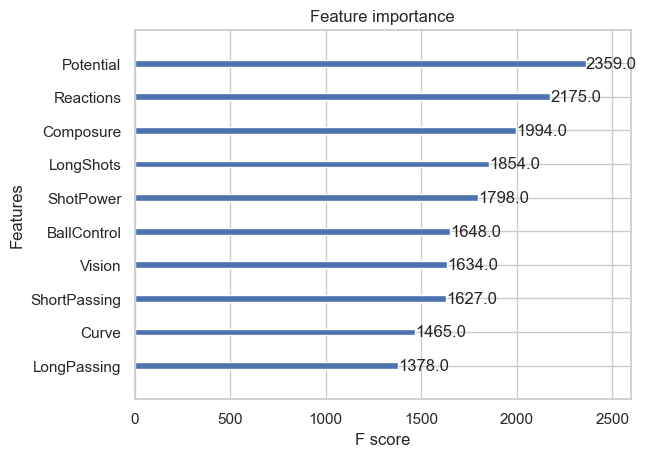

In [110]:
xgb.plot_importance(best_xgb_model)
plt.show()

Model #3: Random Forests

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7,9, 12, 15],
              'min_samples_split': [2, 5, 10]}

In [114]:
rf_model = RandomForestClassifier()

In [115]:
start_time = time.time()
# Perform nested cross-validation with grid search
grid_rf = GridSearchCV(rf_model, param_grid=param_grid, cv=cv_inner, scoring='f1', n_jobs=-1)
scores_rf = cross_val_score(grid, X_train, y_train, cv=cv_outer, scoring='f1', n_jobs=-1)

In [116]:
grid_rf.fit(X_train, y_train)
best_rf_model = grid_rf.best_estimator_

end_time = time.time()

rf_training_time = end_time - start_time

c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [117]:
print("Best parameters: ", grid_rf.best_params_)
print ("Model Training Time: {:.3f} seconds".format(rf_training_time))

Best parameters:  {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Model Training Time: 196.850 seconds


In [118]:
print(classification_report(y_train, best_rf_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.92      0.35      0.51       401
           2       0.84      0.83      0.83      3830
           3       0.79      0.92      0.85      7163
           4       0.77      0.49      0.60      2138
           5       0.00      0.00      0.00        67

    accuracy                           0.80     13608
   macro avg       0.55      0.43      0.46     13608
weighted avg       0.80      0.80      0.79     13608



c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [122]:
y_pred_rf = best_rf_model.predict(X_test)

In [123]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.93      0.41      0.57       139
           2       0.85      0.81      0.83      1252
           3       0.79      0.92      0.85      2450
           4       0.72      0.46      0.56       670
           5       0.00      0.00      0.00        22

    accuracy                           0.80      4537
   macro avg       0.55      0.43      0.47      4537
weighted avg       0.80      0.80      0.79      4537



c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


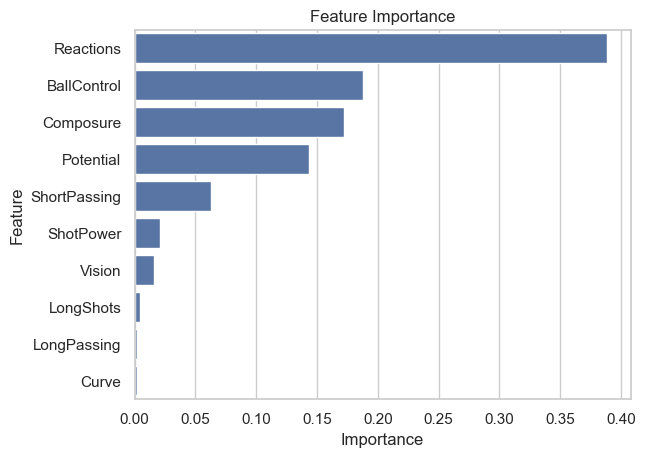

In [124]:
importances = best_rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

names = [X_train.columns[i] for i in indices]

plt.figure()

plt.title("Feature Importance")

sns.barplot(x=importances[indices], y=names)


plt.xlabel("Importance")
plt.ylabel("Feature")

plt.show()

In [132]:
# Precision scores for the four models on training data
prec_lr_train = precision_score(y_train, best_lr_model.predict(X_train), average='weighted')

prec_xgb_train = precision_score(y_train, best_xgb_model.predict(X_train), average='weighted')

prec_rf_train = precision_score(y_train, best_rf_model.predict(X_train), average='weighted')


prec_train = [prec_lr_train, prec_xgb_train, prec_rf_train]

# Precision scores for the four models on testing data
prec_lr_test = precision_score(y_test, y_pred, average='weighted')

prec_xgb_test = precision_score(y_test, y_pred_xgb,  average='weighted')

prec_rf_test = precision_score(y_test, y_pred_rf,  average='weighted')

prec_test = [prec_lr_test, prec_xgb_test, prec_rf_test]

# Recall scores for the four models on training data
rec_lr_train = recall_score(y_train, best_lr_model.predict(X_train), average='weighted')

rec_xgb_train = recall_score(y_train, best_xgb_model.predict(X_train), average='weighted')

rec_rf_train = recall_score(y_train, best_rf_model.predict(X_train),  average='weighted')


rec_train = [rec_lr_train, rec_xgb_train, rec_rf_train]


# Calculting Recall for the four models on test data
rec_lr_test = recall_score(y_test, y_pred, average='weighted')

rec_xgb_test = recall_score(y_test, y_pred_xgb, average='weighted')

rec_rf_test = recall_score(y_test, y_pred_rf, average='weighted')

rec_test = [rec_lr_test, rec_xgb_test, rec_rf_test]

# Accuracy scores for the four models on training data
acc_lr_train = accuracy_score(y_train, best_lr_model.predict(X_train))

acc_xgb_train = accuracy_score(y_train, best_xgb_model.predict(X_train))

acc_rf_train = accuracy_score(y_train, best_rf_model.predict(X_train))


acc_train = [acc_lr_train, acc_xgb_train, acc_rf_train]

# Calculating Accuracy for the four models on test data
acc_lr_test = accuracy_score(y_test, y_pred)

acc_xgb_test = accuracy_score(y_test, y_pred_xgb)

acc_rf_test = accuracy_score(y_test, y_pred_rf)


acc_test = [acc_lr_test, acc_xgb_test, acc_rf_test]

# Model training time
train_time =[lr_training_time/60, xgb_training_time/60, rf_training_time/60]

c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DKC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DKC\anaconda3\Lib\site-packages\sklea

In [134]:
# Creating of dataframe of summary results
summary_df = pd.DataFrame({'Model Name':['Logistic Regression','XG Boost','Random Forests'],
                          'Training Accuracy': acc_train, 'Training Precision': prec_train,'Training Recall':rec_train,
                          'Testing Accuracy': acc_test, 'Testing Precision': prec_test,'Testing Recall':rec_test,
                          'Training Time (mins)': train_time})

summary_df.set_index('Model Name', inplace=True)
# Displaying summary of results
summary_df

,Training Accuracy,Training Precision,Training Recall,Testing Accuracy,Testing Precision,Testing Recall,Training Time (mins)
Model Name,,,,,,,
Logistic Regression,0.793210,0.787582,0.793210,0.112409,0.133787,0.112409,1.669162
XG Boost,0.927175,0.926955,0.927175,0.862905,0.859811,0.862905,6.108285
Random Forests,0.802396,0.799263,0.802396,0.799647,0.795252,0.799647,3.280832
